Few libraries needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definition of the board

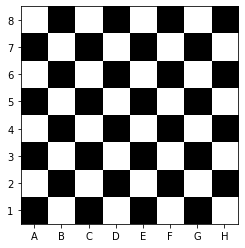

In [2]:
line = [k%2 for k in range(8)]
line1 = [1-k%2 for k in range(8)]
boardControlled = np.array([line1 if k%2 else line for k in range(8)])

colors = np.array([[0, 0, 0],   # black squares controlled
                    [255, 255, 255],   # white squares controlled
                    [255, 0, 0],   # red : squares not controlled
                    [255, 192, 203], # pink : queens
                    [0, 255, 0]]) # green : the bishop

def showBoard(board):
    plt.imshow(colors[board])
    plt.ylim((-0.5,7.5))
    plt.xticks([k for k in range(8)], ['A','B','C','D','E','F','G','H'])
    plt.yticks([k for k in range(8)], [str(k+1) for k in range(8)])
    plt.show()

showBoard(boardControlled)

Let's make an abstract class Piece

In [3]:
class Piece():
    
    def __init__(self, board, pos_i, pos_j):
        self.board = board
        self.pos_i = pos_i
        self.pos_j = pos_j
    
    def getListPosition(self):
        pass
    
    def addPiece(self):
        pass

Use it to define a bishop

In [4]:
class Bishop(Piece):
    
    def __init__(self, board, pos_i, pos_j):
        Piece.__init__(self, board, pos_i, pos_j)
        
    def getListPositions(self):
        listPositions = []
    
        i = self.pos_i
        j = self.pos_j
        freeWay = True
        while i<8 and j<8 and freeWay:
            if self.board[j,i] == 2:
                listPositions.append((i,j))
            if self.board[j,i] >2:
                freeWay = False
            i+=1
            j+=1

        i = self.pos_i
        j = self.pos_j
        freeWay = True
        while i<8 and j>=0 and freeWay:
            if self.board[j,i] == 2:
                listPositions.append((i,j))
            if self.board[j,i] >2:
                freeWay = False
            i+=1
            j-=1

        i = self.pos_i
        j = self.pos_j
        while i>=0 and j<8 and freeWay:
            if self.board[j,i] == 2:
                listPositions.append((i,j))
            if self.board[j,i] >2:
                freeWay = False
            i-=1
            j+=1

        i = self.pos_i
        j = self.pos_j
        while i>=0 and j>=0 and freeWay:
            if self.board[j,i] == 2:
                listPositions.append((i,j))
            if self.board[j,i] >2:
                freeWay = False
            i-=1
            j-=1

        return listPositions

    def addPiece(self):
        for square in self.getListPositions():
            self.board[square[1]][square[0]] = boardControlled[square[1]][square[0]]
        self.board[self.pos_j][self.pos_i] = 4

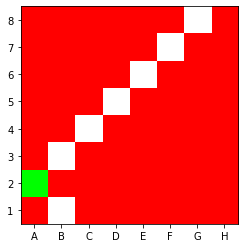

In [5]:
boardBishop = 2*np.ones(64,int).reshape(8,8)

b1 = Bishop(boardBishop,0,1)
b1.addPiece()

showBoard(boardBishop)

And the queen

In [6]:
class Queen(Bishop):
    
    def __init__(self, board, pos_i, pos_j):
        super().__init__(board, pos_i, pos_j)
    
    def getListPositions(self):
    
        listPositions = super().getListPositions()

        i = self.pos_i
        freeWay = True
        while i<8 and freeWay:
            if self.board[self.pos_j,i] == 2:
                listPositions.append((i,self.pos_j))
            if self.board[self.pos_j,i] >2:
                freeWay = False
            i+=1

        i = self.pos_i
        freeWay = True
        while i>=0 and freeWay:
            if self.board[self.pos_j,i] == 2:
                listPositions.append((i,self.pos_j))
            if self.board[self.pos_j,i] >2:
                freeWay = False
            i-=1

        j = self.pos_j
        while j<8 and freeWay:
            if self.board[j,self.pos_i] == 2:
                listPositions.append((self.pos_i,j))
            if self.board[j,self.pos_i] >2:
                freeWay = False
            j+=1

        j = self.pos_j
        while j>=0 and freeWay:
            if self.board[j,self.pos_i] == 2:
                listPositions.append((self.pos_i,j))
            if self.board[j,self.pos_i] >2:
                freeWay = False
            j-=1
        
        return listPositions

    def addPiece(self):
        super().addPiece()
        self.board[self.pos_j][self.pos_i] = 3
        

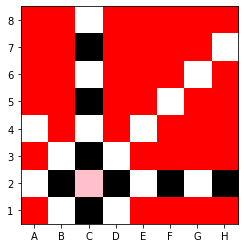

In [7]:
boardQueen = 2*np.ones(64,int).reshape(8,8)

b = Queen(boardQueen,2,1)
b.addPiece()

showBoard(boardQueen)

Now let's solve the problem!

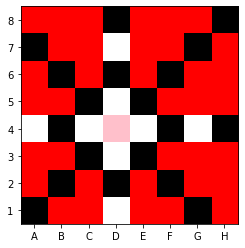

In [8]:
boardIni = 2*np.ones(64,int).reshape(8,8)

#dict key i,j the id of squares -> gives the number of cases controlled by positions if you add a queen in i,j
pos = dict()

# first queen

for i in range(8):
    for j in range(8):
        q = Queen(boardIni, i,j)
        pos[(i,j)] = len(q.getListPositions())

pos_opti = max(pos, key=pos.get)
# max cases controlled for 3,3
q = Queen(boardIni, pos_opti[0], pos_opti[1])
q.addPiece()

showBoard(boardIni)

Now, we place the four queens with this method

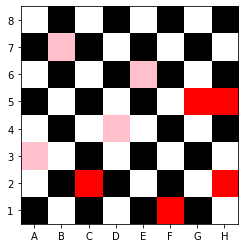

In [9]:
boardIni = 2*np.ones(64,int).reshape(8,8)

l=0
while l < 4:
    for i in range(8):
        for j in range(8):
            q = Queen(boardIni, i,j)
            pos[(i,j)] = len(q.getListPositions())
    pos_opti = max(pos, key=pos.get)
    q = Queen(boardIni, pos_opti[0], pos_opti[1])
    q.addPiece()
    l+=1

showBoard(boardIni)

Definitely not working, let's try to place the bishop first :-)

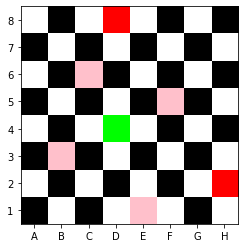

In [10]:
boardIni = 2*np.ones(64,int).reshape(8,8)

#dict key i,j the id of squares -> gives the number of cases controlled by positions if you add a bishop in i,j
pos = dict()

# first the bishop

for i in range(8):
    for j in range(8):
        q = Bishop(boardIni, i,j)
        pos[(i,j)] = len(q.getListPositions())

pos_opti = max(pos, key=pos.get)
q = Bishop(boardIni, pos_opti[0], pos_opti[1])
q.addPiece()

# then the four queens

l=0
while l < 4:
    for i in range(8):
        for j in range(8):
            q = Queen(boardIni, i,j)
            pos[(i,j)] = len(q.getListPositions())
    pos_opti = max(pos, key=pos.get)
    q = Queen(boardIni, pos_opti[0], pos_opti[1])
    q.addPiece()
    l+=1

showBoard(boardIni)

Close, but not getting the solution yet

The greedy policy does not work immediatly with the first solution, let's try to choose randomly (uniform) one of the best solutions

In [11]:
def simulateGame():
    # return True with the board if the game is won
    # else return false
    win = False
    
    boardIni = 2*np.ones(64,int).reshape(8,8)

    pos = dict()

    l=0
    while l < 4:
        for i in range(8):
            for j in range(8):
                q = Queen(boardIni, i,j)
                pos[(i,j)] = len(q.getListPositions())
        
        list_pos_opti =[k for k in pos.keys() if np.abs(pos[k]-pos[max(pos, key=pos.get)]) < 3]
        # add some variability
        rand_index = np.random.randint(0,len(list_pos_opti))
        pos_opti = list_pos_opti[rand_index]
        q = Queen(boardIni, pos_opti[0], pos_opti[1])
        q.addPiece()
        l+=1
    
    
    for i in range(8):
        for j in range(8):
            q = Bishop(boardIni, i,j)
            pos[(i,j)] = len(q.getListPositions())
    
    pos_opti = max(pos, key=pos.get)
    q = Bishop(boardIni, pos_opti[0], pos_opti[1])
    q.addPiece()
    
    if 2 not in boardIni:
        showBoard(boardIni)
        win = True
    return win

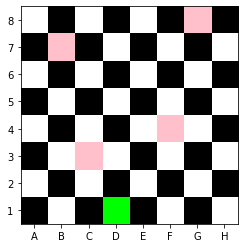

In [12]:
nbGameMax = 50000
countGame = 0
win = False
while countGame < nbGameMax and not win:
    win = simulateGame()
    countGame+=1
if countGame == nbGameMax:
    print("No solution")